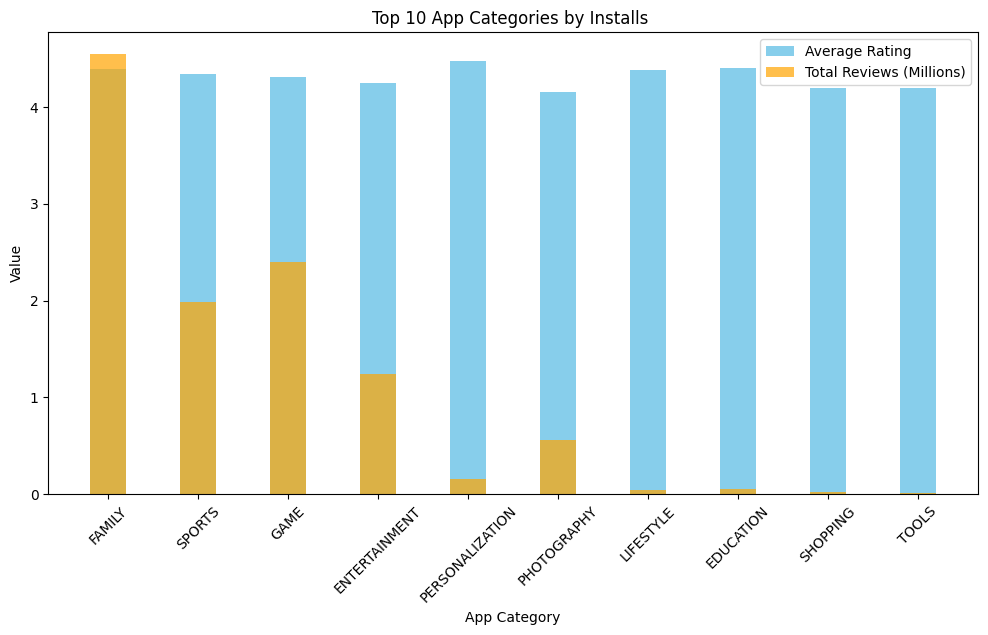

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz


apps_df = pd.read_csv("Play Store Data.csv")


def convert_size(size):
    if isinstance(size, str):
        if "M" in size:
            return float(size.replace("M", ""))
        elif "K" in size:
            return float(size.replace("K", "")) / 1000 
    return None  
apps_df["Size"] = apps_df["Size"].apply(convert_size)


apps_df["Reviews"] = pd.to_numeric(apps_df["Reviews"], errors="coerce")


apps_df["Installs"] = apps_df["Installs"].astype(str)
apps_df["Installs"] = apps_df["Installs"].str.replace(",", "").str.replace("+", "")
apps_df["Installs"] = pd.to_numeric(apps_df["Installs"], errors="coerce")  


apps_df["Last Updated"] = pd.to_datetime(apps_df["Last Updated"], errors="coerce")
apps_df = apps_df[apps_df["Last Updated"].dt.month == 1]


apps_df = apps_df.dropna(subset=["Size", "Reviews", "Installs", "Rating"])


filtered_apps = apps_df[(apps_df["Rating"] >= 4.0) & (apps_df["Size"] >= 10)]


top_categories = (
    filtered_apps.groupby("Category")
    .agg({"Rating": "mean", "Reviews": "sum", "Installs": "sum"})
    .sort_values("Installs", ascending=False)
    .head(10)  # Select top 10
)


ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.datetime.now(ist).time()


if datetime.time(15, 0) <= current_time <= datetime.time(17, 0):
    try:
    
        fig, ax = plt.subplots(figsize=(12, 6))
        width = 0.4  # Width of bars
        categories = top_categories.index

        ax.bar(categories, top_categories["Rating"], width, label="Average Rating", color="skyblue")
        ax.bar(categories, top_categories["Reviews"] / 1e6, width, label="Total Reviews (Millions)", color="orange", alpha=0.7)

       
        ax.set_xlabel("App Category")
        ax.set_ylabel("Value")
        ax.set_title("Top 10 App Categories by Installs ")
        ax.legend()
        plt.xticks(rotation=45)
        plt.show()
    
    except Exception as e:
        print("Error while plotting the chart:", e)

else:
    print("This chart is only available between 3 PM and 5 PM IST.")
